In [1]:
from ultralytics import YOLO
model = YOLO("./runs/detect/train123/weights/best.pt")
results = model.predict(source="./final_test", imgsz=(1024,1024), iou=0.2, conf=0.5, save_conf=True, save=False, save_txt=True,
                  exist_ok=True, device=1, augment=True, verbose=False)

Results saved to runs/detect/predict
1 label saved to runs/detect/predict/labels


In [2]:
"""
res.path.split("/")[-1]: 사진 이름
res.boxes.cls: class_id
res.boxes.conf: confidence score
res.boxes.xyxy: lower left, upper right
"""
for_submit = []
for i in range(len(results)):
    n = len(results[i].boxes.cls)
    for j in range(n):
        x_min, y_min, x_max, y_max = map(int,results[i].boxes.xyxy[j])
        #x_min, y_min, x_max, y_max = map(float,results[i].boxes.xyxy[j])
        for_submit.append([results[i].path.split("/")[-1], int(results[i].boxes.cls[j]), float(results[i].boxes.conf[j]), x_min, y_max, x_max, y_max, x_max, y_min, x_min, y_min])

In [3]:
import pandas as pd
submission = pd.DataFrame(for_submit)
col = pd.read_csv("./sample_submission.csv").columns
submission.columns = col
#submission = submission[submission['confidence']>=0.7]
submission.head(5)

,file_name,class_id,confidence,point1_x,point1_y,point2_x,point2_y,point3_x,point3_y,point4_x,point4_y
0,img_for_test.png,33,0.977376,1185,564,1450,564,1450,289,1185,289
1,img_for_test.png,1,0.707673,409,657,684,657,684,364,409,364


In [4]:
import os
sub_dir = "./submissions/"
file_num = str(len(os.listdir(sub_dir)))
submission.to_csv(sub_dir + "submission" + file_num + ".csv",index=False)

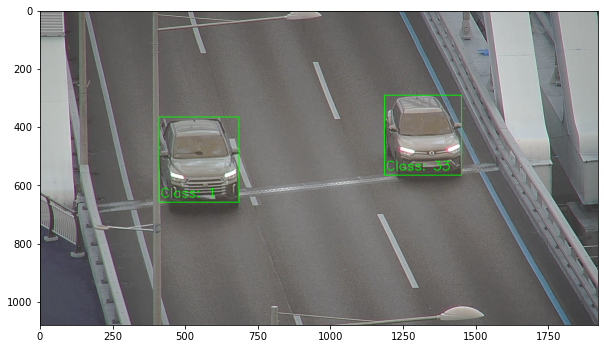

In [5]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
# 이미지 경로
#df = pd.read_csv("./submissions/submission2.csv")
#submission = submission[submission['confidence']]
image_path = "./final_test/img_for_test.png"
image = cv2.imread(image_path)

# bounding box 좌표
for i in range(len(submission)):
    x1, y1, x2, y2, x3, y3, x4, y4 = list(submission.iloc[i][3:])
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)  # 좌상단 -> 우상단
    cv2.line(image, (x2, y2), (x3, y3), (0, 255, 0), 2)  # 우상단 -> 우하단
    cv2.line(image, (x3, y3), (x4, y4), (0, 255, 0), 2)  # 우하단 ->좌하단
    cv2.line(image, (x4, y4), (x1, y1), (0, 255, 0), 2)  # 좌하단 -> 좌상단
    class_label = "Class: " + str(submission.iloc[i][1])  # 클래스 번호
    text_size, _ = cv2.getTextSize(class_label, cv2.FONT_HERSHEY_SIMPLEX, 0.5, 2)  # 텍스트 크기 계산
    text_x = x1 + 5  # 텍스트가 표시될 x 좌표
    text_y = y1 - text_size[1] - 5  # 텍스트가 표시될 y 좌표
    cv2.putText(image, class_label, (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 255, 0), 2)  # 클래스 번호 표시
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()